<a href="https://colab.research.google.com/github/Samrajan2919/SAM/blob/master/car_brand_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
 
import sklearn

In [ ]:
import pandas as pd
import numpy as np
A=np.array([[2,4],[3,5],[7,8]])
b=A[[0,1,2],[0,1,0]]
print(b)

[2 5 7]


In [ ]:
def f(L,incr):
   map(lambda x:x+incr,L)
arr=[1,2,3]
f(arr,1)
print(arr)

[1, 2, 3]


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/CAR DETAILS FROM CAR DEKHO (1).csv')
 
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#find  number of categorical feature 
data.shape

(4340, 8)

In [ ]:
# we can see that fuel sellertype transmission and owner are categorical(how many unique categoricl )
print(data['seller_type'].unique())
print(data['fuel'].unique())
print(data['transmission'].unique())
print(data['owner'].unique())

['Individual' 'Dealer' 'Trustmark Dealer']
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
['Manual' 'Automatic']
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


In [ ]:
#missing or nullvalue
data.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [ ]:
data.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [ ]:
data.describe

<bound method NDFrame.describe of                                      name  year  ...  transmission         owner
0                           Maruti 800 AC  2007  ...        Manual   First Owner
1                Maruti Wagon R LXI Minor  2007  ...        Manual   First Owner
2                    Hyundai Verna 1.6 SX  2012  ...        Manual   First Owner
3                  Datsun RediGO T Option  2017  ...        Manual   First Owner
4                   Honda Amaze VX i-DTEC  2014  ...        Manual  Second Owner
...                                   ...   ...  ...           ...           ...
4335  Hyundai i20 Magna 1.4 CRDi (Diesel)  2014  ...        Manual  Second Owner
4336           Hyundai i20 Magna 1.4 CRDi  2014  ...        Manual  Second Owner
4337                  Maruti 800 AC BSIII  2009  ...        Manual  Second Owner
4338     Hyundai Creta 1.6 CRDi SX Option  2016  ...        Manual   First Owner
4339                     Renault KWID RXT  2016  ...        Manual   First 

In [ ]:
# number of years(skip car name)
final_dataset=data[[ 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
# new feature 
final_dataset['current_year']=2021
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021


In [ ]:
final_dataset['number_of_year']=final_dataset['current_year']-final_dataset['year']
final_dataset.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,number_of_year
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [ ]:
#year and current year not requried so drop
final_dataset.drop(['year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,number_of_year
0,60000,70000,Petrol,Individual,Manual,First Owner,2021,14
1,135000,50000,Petrol,Individual,Manual,First Owner,2021,14
2,600000,100000,Diesel,Individual,Manual,First Owner,2021,9
3,250000,46000,Petrol,Individual,Manual,First Owner,2021,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,2021,7


In [ ]:
 
final_dataset.drop(['current_year'],axis=1,inplace=True)

In [ ]:
final_dataset.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,number_of_year
0,60000,70000,Petrol,Individual,Manual,First Owner,14
1,135000,50000,Petrol,Individual,Manual,First Owner,14
2,600000,100000,Diesel,Individual,Manual,First Owner,9
3,250000,46000,Petrol,Individual,Manual,First Owner,4
4,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [ ]:
# categorical feature into value(grt_dummies)
final_dataset=pd.get_dummies(final_dataset,drop_first=True)

In [ ]:
final_dataset.head(3)

,selling_price,km_driven,number_of_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,60000,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,135000,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,600000,100000,9,1,0,0,0,1,0,1,0,0,0,0


In [ ]:
# cgn is drop from data set from fuel column

In [ ]:
#correaltion
final_dataset.corr()

,selling_price,km_driven,number_of_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
selling_price,1.000000,-0.192289,-0.413922,0.282947,-0.005095,-0.042434,-0.269453,-0.236798,0.110176,-0.530205,-0.078725,-0.161986,0.048799,-0.111326
km_driven,-0.192289,1.000000,0.419688,0.285396,-0.001372,0.036652,-0.291139,0.182663,-0.089858,0.120226,0.097349,0.195203,-0.083445,0.194713
number_of_year,-0.413922,0.419688,1.000000,-0.121424,0.025540,0.051266,0.114908,0.173703,-0.100225,0.143800,0.186361,0.292349,-0.095795,0.244308
fuel_Diesel,0.282947,0.285396,-0.121424,1.000000,-0.015063,-0.072422,-0.970934,-0.035314,-0.007911,-0.048098,-0.021054,0.003524,-0.010575,0.009373
fuel_Electric,-0.005095,-0.001372,0.025540,-0.015063,1.000000,-0.001108,-0.014856,-0.026118,-0.002355,-0.044746,-0.002094,0.025960,-0.000952,-0.004166
fuel_LPG,-0.042434,0.036652,0.051266,-0.072422,-0.001108,1.000000,-0.071427,0.035122,-0.011324,0.024764,0.013384,0.030141,-0.004577,0.004836
fuel_Petrol,-0.269453,-0.291139,0.114908,-0.970934,-0.014856,-0.071427,1.000000,0.029845,0.012489,0.039614,0.011502,-0.012717,0.012427,-0.008502
seller_type_Individual,-0.236798,0.182663,0.173703,-0.035314,-0.026118,0.035122,0.029845,1.000000,-0.266904,0.214163,0.072322,0.186573,-0.107886,0.140823
seller_type_Trustmark Dealer,0.110176,-0.089858,-0.100225,-0.007911,-0.002355,-0.011324,0.012489,-0.266904,1.000000,-0.042346,-0.021395,-0.076764,-0.009729,-0.042578
transmission_Manual,-0.530205,0.120226,0.143800,-0.048098,-0.044746,0.024764,0.039614,0.214163,-0.042346,1.000000,0.035597,0.068068,0.009152,0.030802


In [ ]:
import seaborn as sns

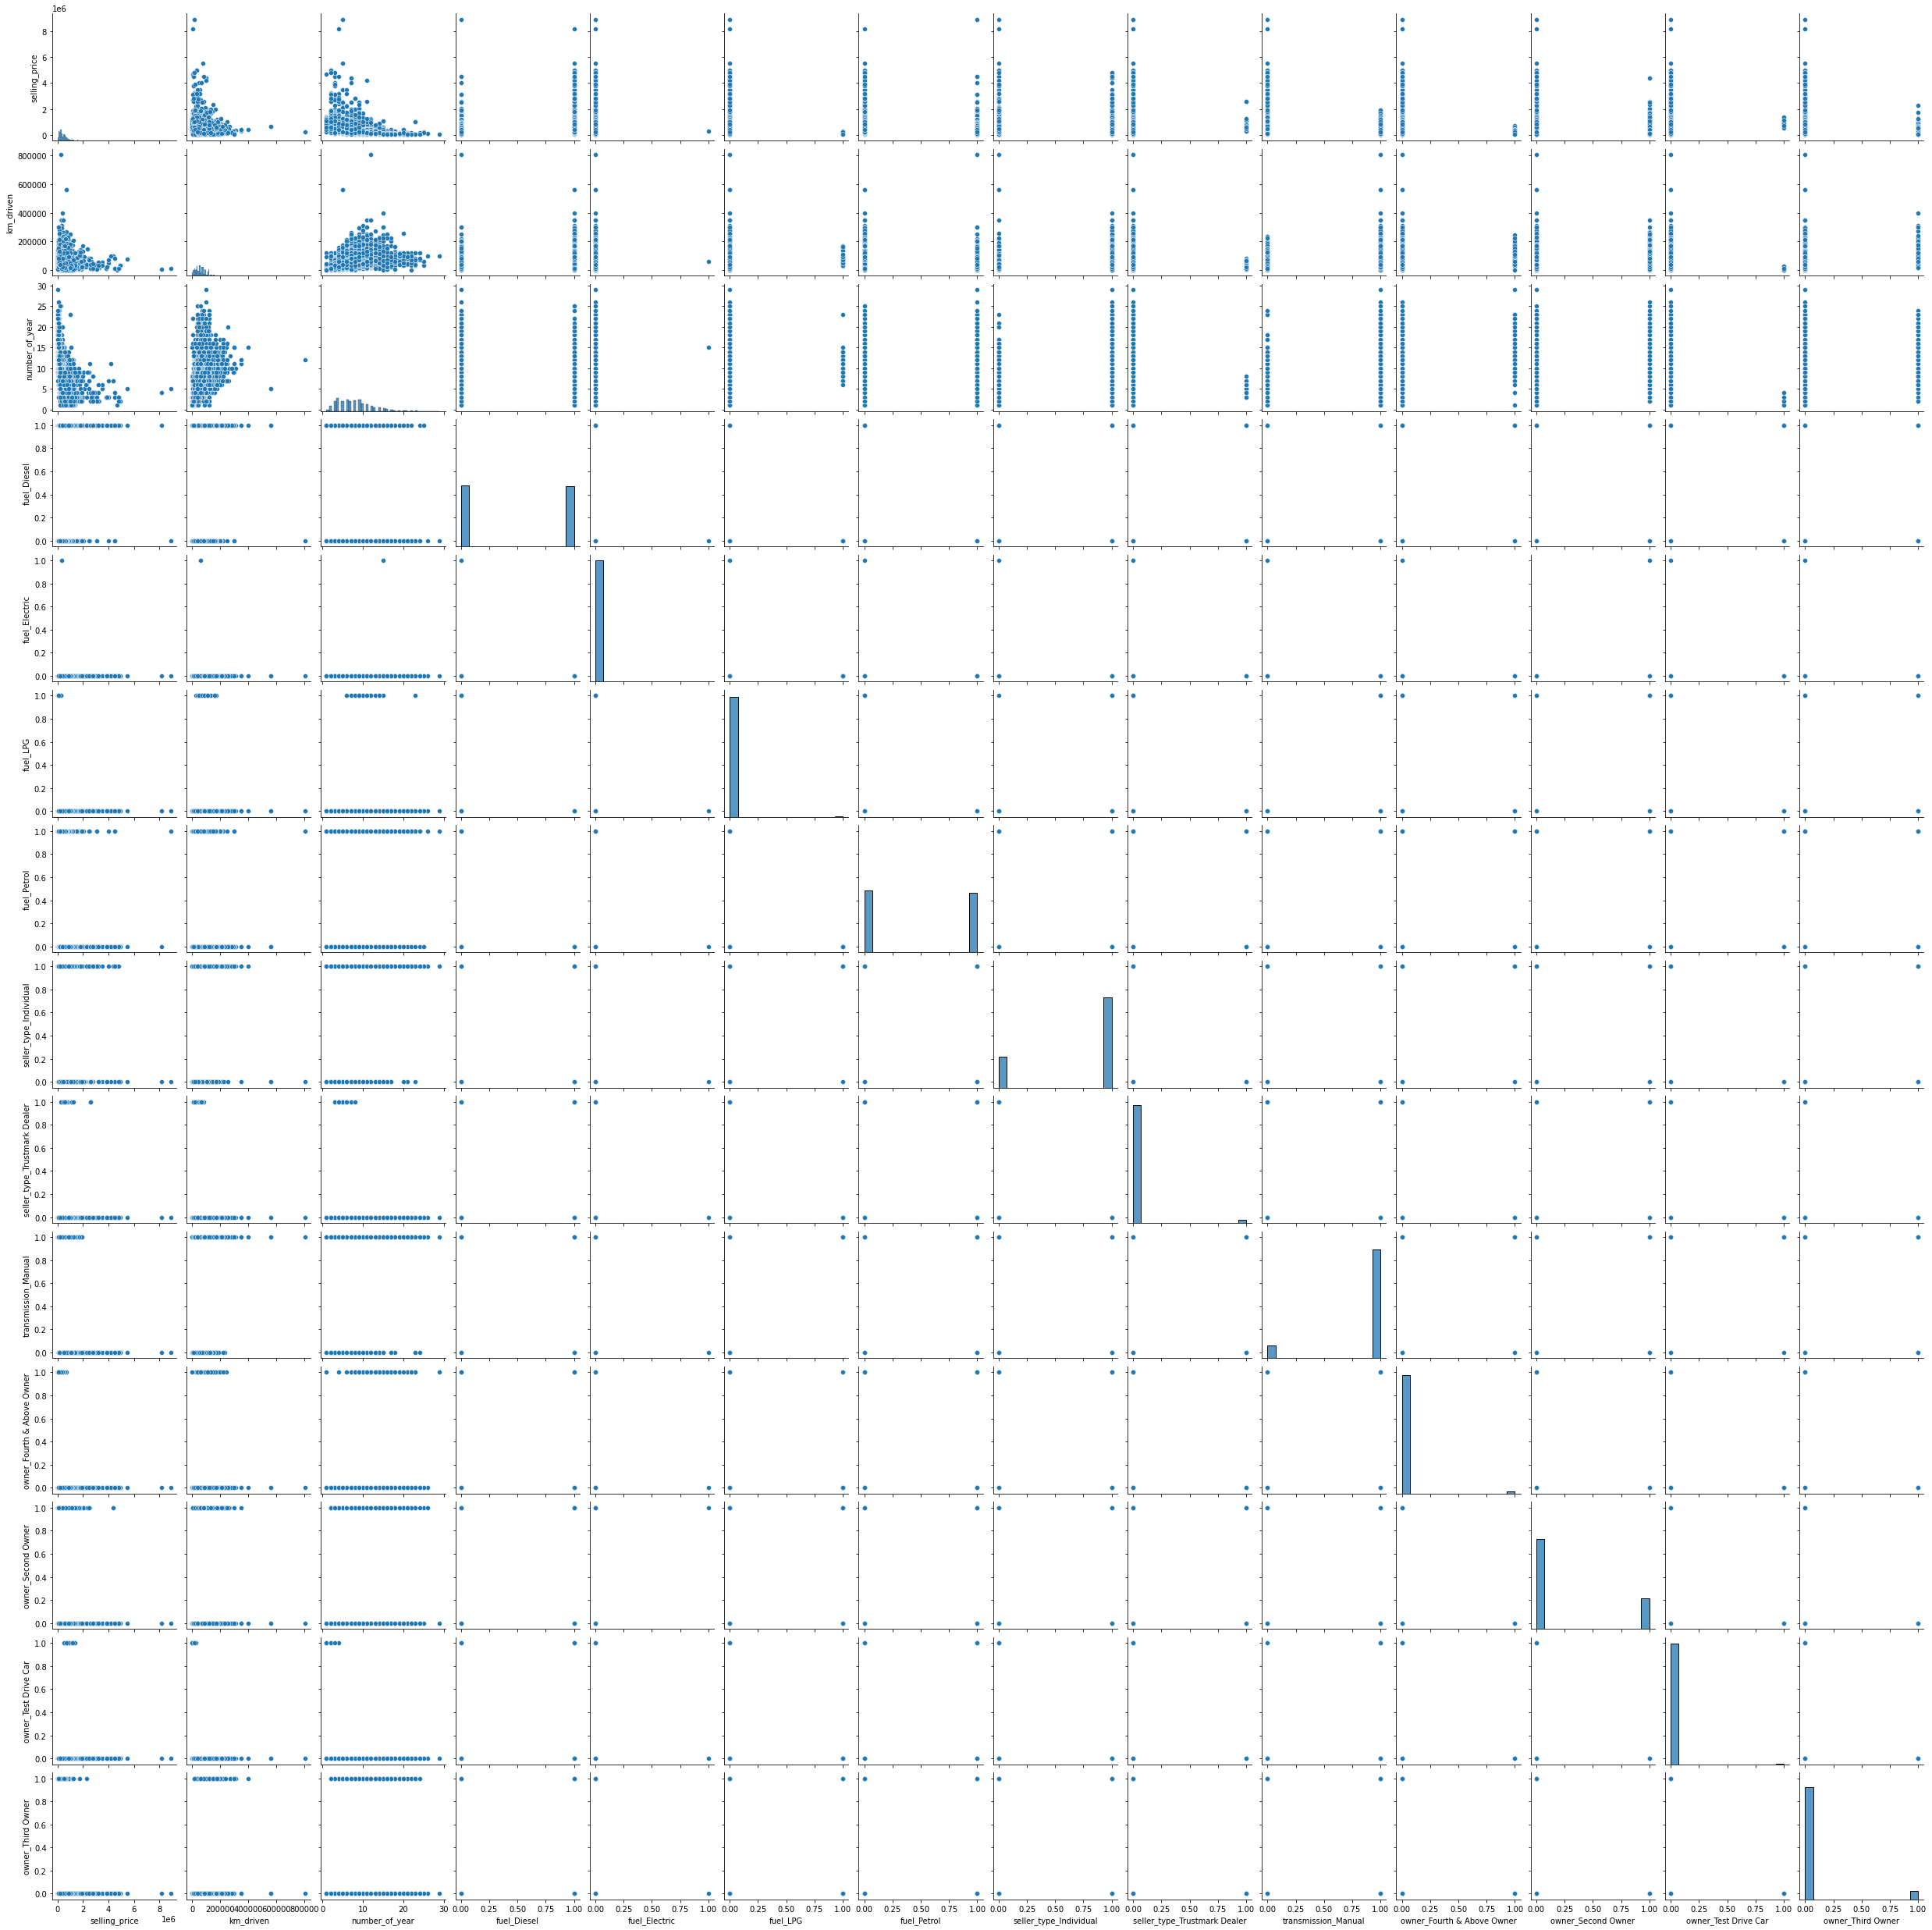

In [ ]:
sns.pairplot(final_dataset)

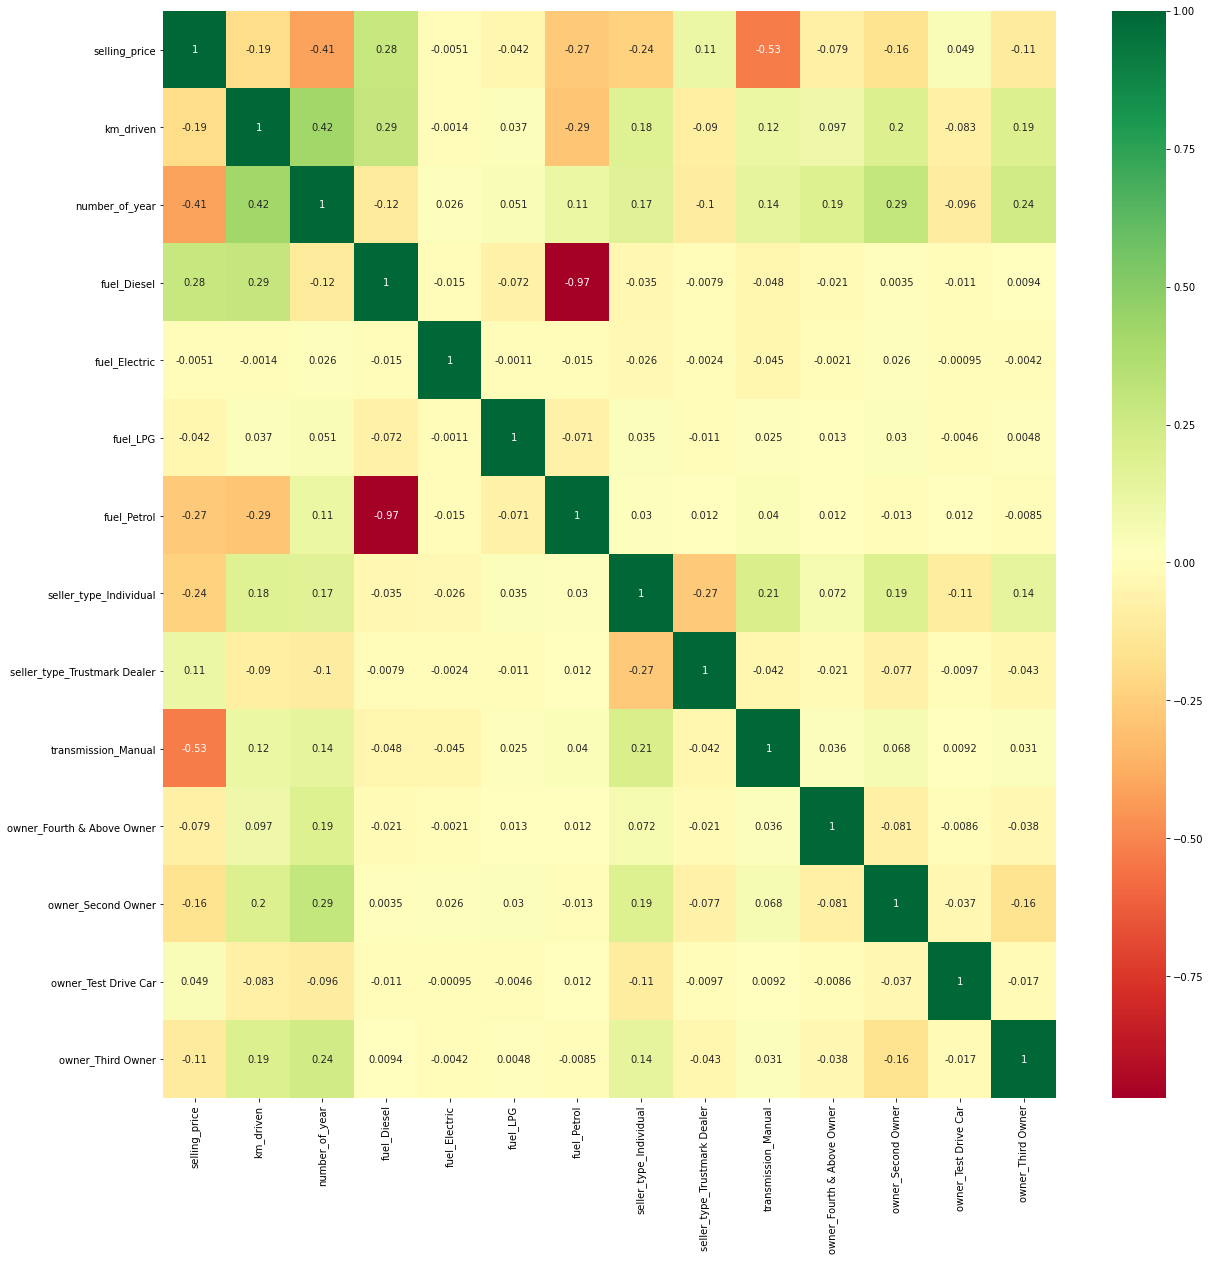

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
corrmat=final_dataset.corr()
top_cor_features=corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(final_dataset[top_cor_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
# indepent and dependent ferature
x=final_dataset.iloc[:,1:]
y=final_dataset.iloc[:,0]
x.head()

,km_driven,number_of_year,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,70000,14,0,0,0,1,1,0,1,0,0,0,0
1,50000,14,0,0,0,1,1,0,1,0,0,0,0
2,100000,9,1,0,0,0,1,0,1,0,0,0,0
3,46000,4,0,0,0,1,1,0,1,0,0,0,0
4,141000,7,1,0,0,0,1,0,1,0,1,0,0


In [ ]:
y.head(2)

0     60000
1    135000
Name: selling_price, dtype: int64

In [ ]:
#feature importance
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
print(model.feature_importances_)

[6.82029867e-01 2.52742315e-01 5.57736158e-03 1.49942461e-04
 1.89663080e-03 5.55162330e-03 8.47054246e-03 6.21844410e-03
 1.36483488e-02 3.98730323e-03 1.14870161e-02 1.29348428e-03
 6.94712159e-03]


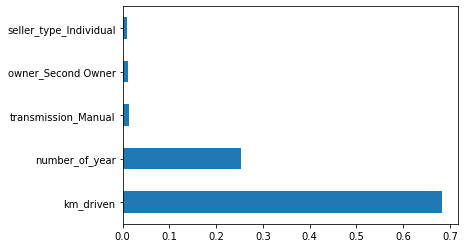

In [ ]:
import pandas as pd
 
p=pd.Series(model.feature_importances_,index=x.columns)
p.nlargest(5).plot(kind='barh')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train,y_train,x_test,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
x_train.shape

(3472, 13)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [ ]:
 
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#Randomized Search CV
 
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [ ]:
 # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
 
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [ ]:
 
# Use the random grid to search for best hyperparameters
# First create the base model to tune
 rf = RandomForestRegressor()

In [ ]:
 # Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [ ]:
 
 
 rf_random.fit(x_train,y_train)

ValueError: ignored

In [ ]:
 rf_random.best_params_

AttributeError: ignored

In [ ]:
 rf_random.best_score_

AttributeError: ignored

In [ ]:
 sns.distplot(y_test-predictions)

In [ ]:
 plt.scatter(y_test,predictions)